In [1]:
options(warn =-1, repr.plot.width=15, repr.plot.height=9)
library(dplyr)
library(stringr)
library(extrafont)
library(ggplot2)
library(gridExtra)
library(scales)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registering fonts with R


다음의 패키지를 부착합니다: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
raw_data_employed <- read.csv("./data/disabled_employed_rawdata_2020.csv")


In [23]:
summary(raw_data_employed)
str(raw_data_employed)

      순번         취업일자              연령         장애유형        
 Min.   :    1   Length:31646       Min.   :17.00   Length:31646      
 1st Qu.: 7912   Class :character   1st Qu.:25.00   Class :character  
 Median :15824   Mode  :character   Median :38.00   Mode  :character  
 Mean   :15824                      Mean   :40.71                     
 3rd Qu.:23735                      3rd Qu.:55.00                     
 Max.   :31646                      Max.   :87.00                     
                                                                      
   중증여부           근무지역         취업직종대분류         연령대     
 Length:31646       Length:31646       Length:31646       20     :10042  
 Class :character   Class :character   Class :character   30     : 5174  
 Mode  :character   Mode  :character   Mode  :character   50     : 4792  
                                                          40     : 4692  
                                                          60     : 4292  
                  

'data.frame':	31646 obs. of  8 variables:
 $ 순번          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 취업일자      : chr  "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01" ...
 $ 연령          : int  65 61 53 64 53 60 63 40 56 62 ...
 $ 장애유형      : chr  "시각장애" "시각장애" "시각장애" "시각장애" ...
 $ 중증여부      : chr  "중증" "중증" "경증" "중증" ...
 $ 근무지역      : chr  "경북 경산시" "경북 고령군" "경북 의성군" "경북 성주군" ...
 $ 취업직종대분류: chr  "경영·행정·사무직" "경영·행정·사무직" "경영·행정·사무직" "경영·행정·사무직" ...
 $ 연령대        : Factor w/ 8 levels "20","30","40",..: 5 5 4 5 4 5 5 3 4 5 ...


In [28]:
length(unique(raw_data_employed$'연령'))

[1] 71

In [3]:
# 연령이 컬럼이 너무 많으므로, 컬럼을 분류화 시킴
raw_data_employed$연령대 <- cut(raw_data_employed$연령, breaks = seq(20, 100, by = 10), labels = c("20","30","40","50","60","70","80","90"), right = FALSE)

In [4]:
table(raw_data_employed$연령대)


   20    30    40    50    60    70    80    90 
10042  5174  4692  4792  4292  1288    89     0 

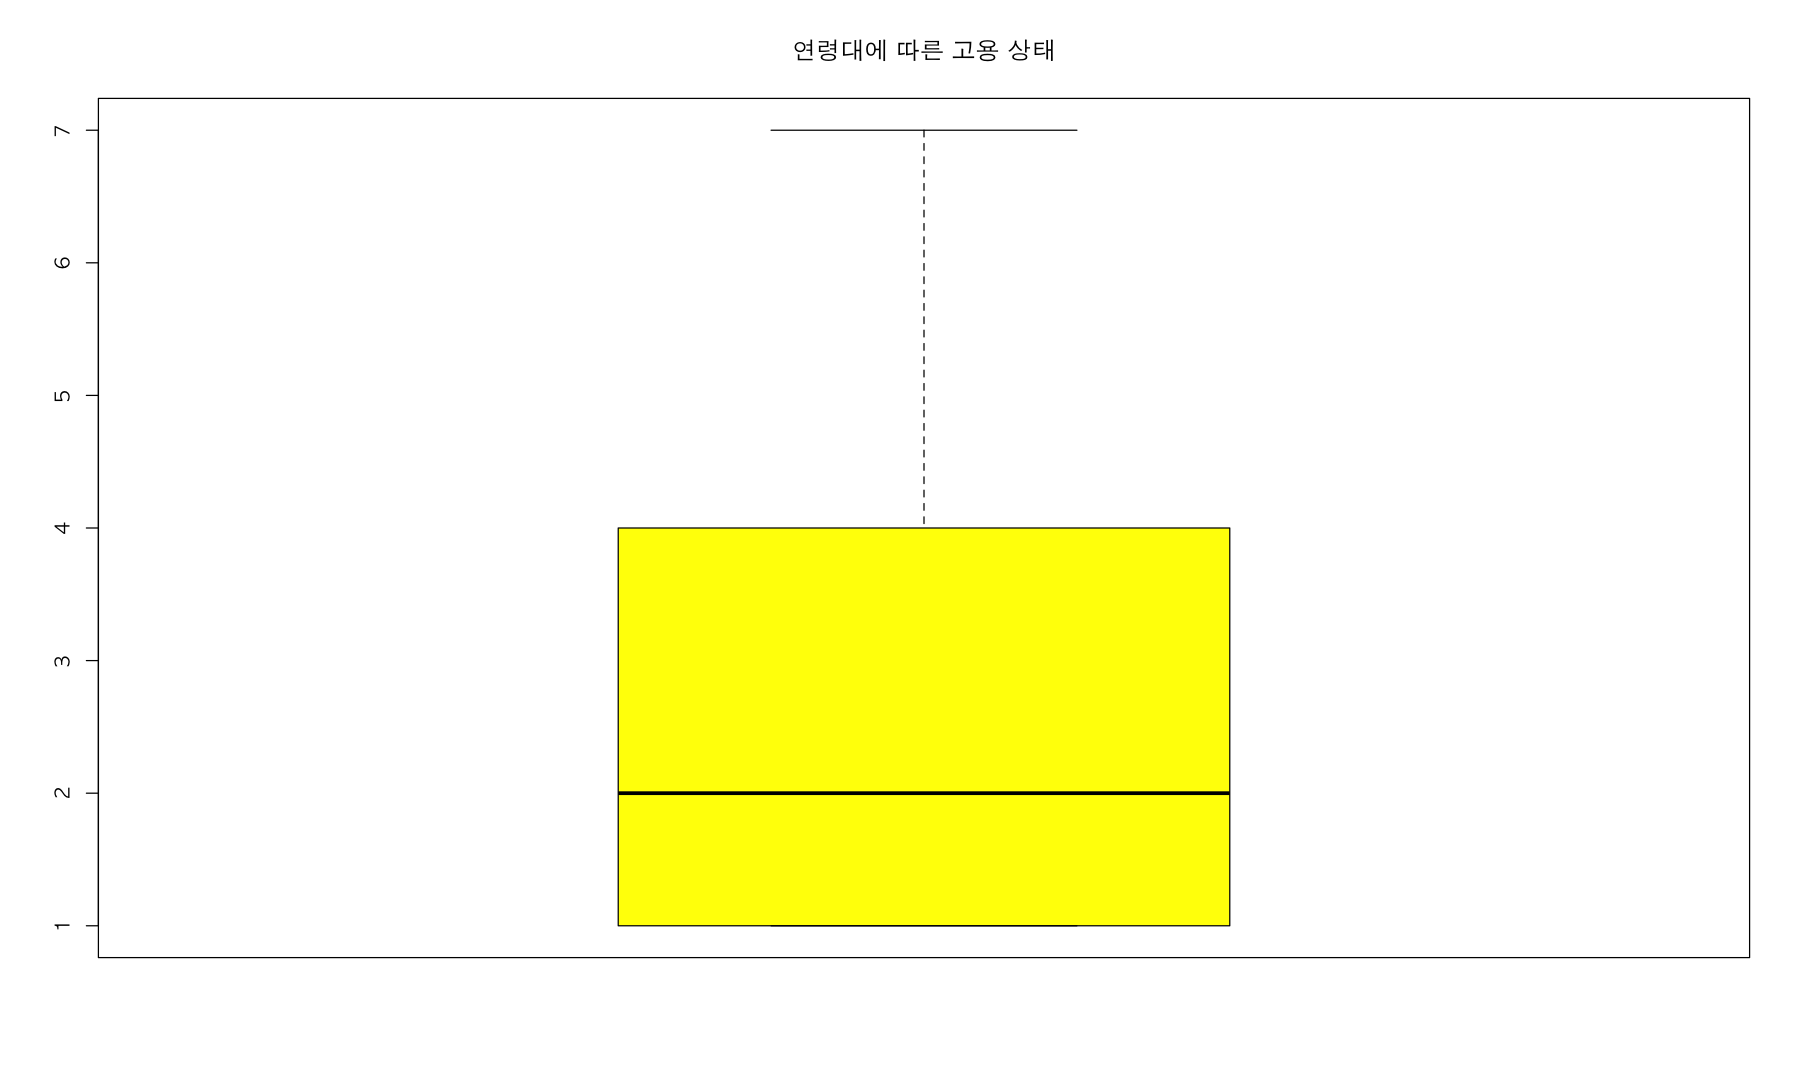

In [5]:
###  연령대에 따른 고용 상태
par(family="AppleGothic",bg="white")
boxplot(as.numeric(raw_data_employed$연령대),
        col = "yellow",
        main = "연령대에 따른 고용 상태"
        # horizontal = TRUE
)


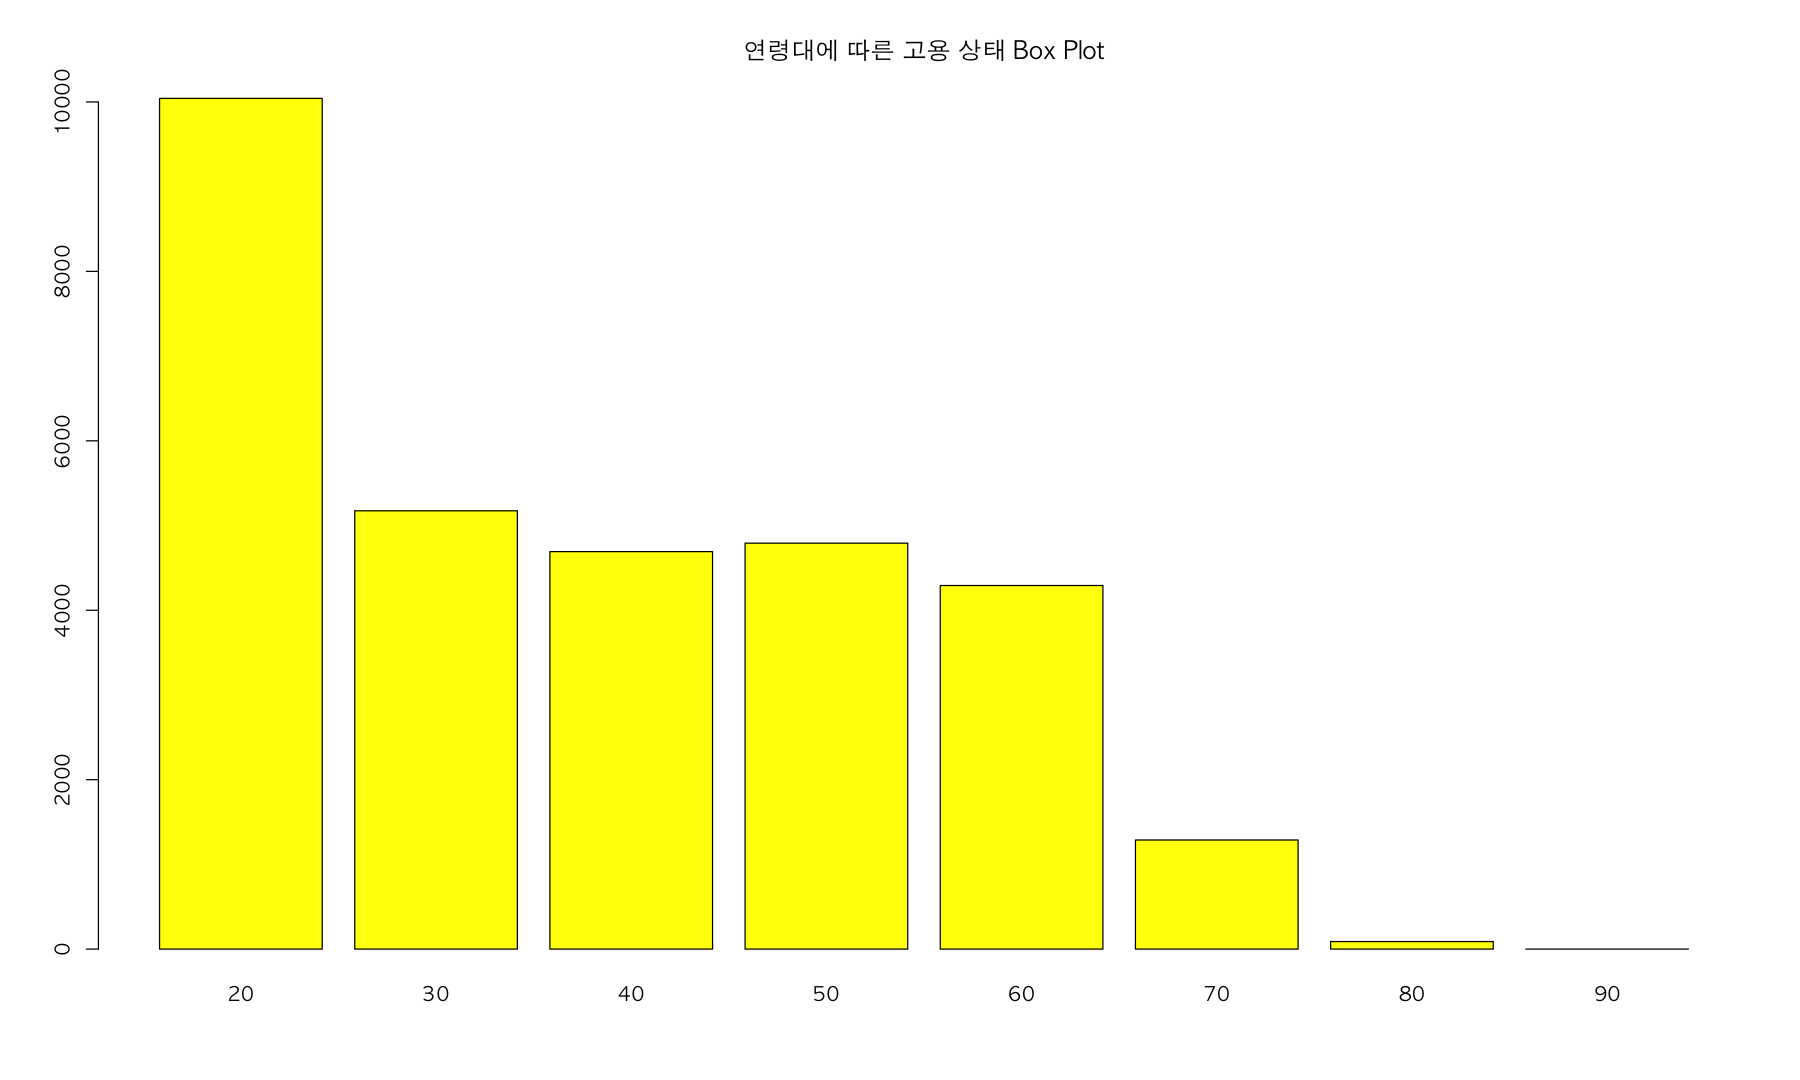

In [6]:
par(family="AppleGothic",bg="white")
barplot(table(raw_data_employed$연령대),    #   정규분포를 보는 표 , summary랑 관련이 있다.
    col ="yellow",
    main = "연령대에 따른 고용 상태 Box Plot"
)

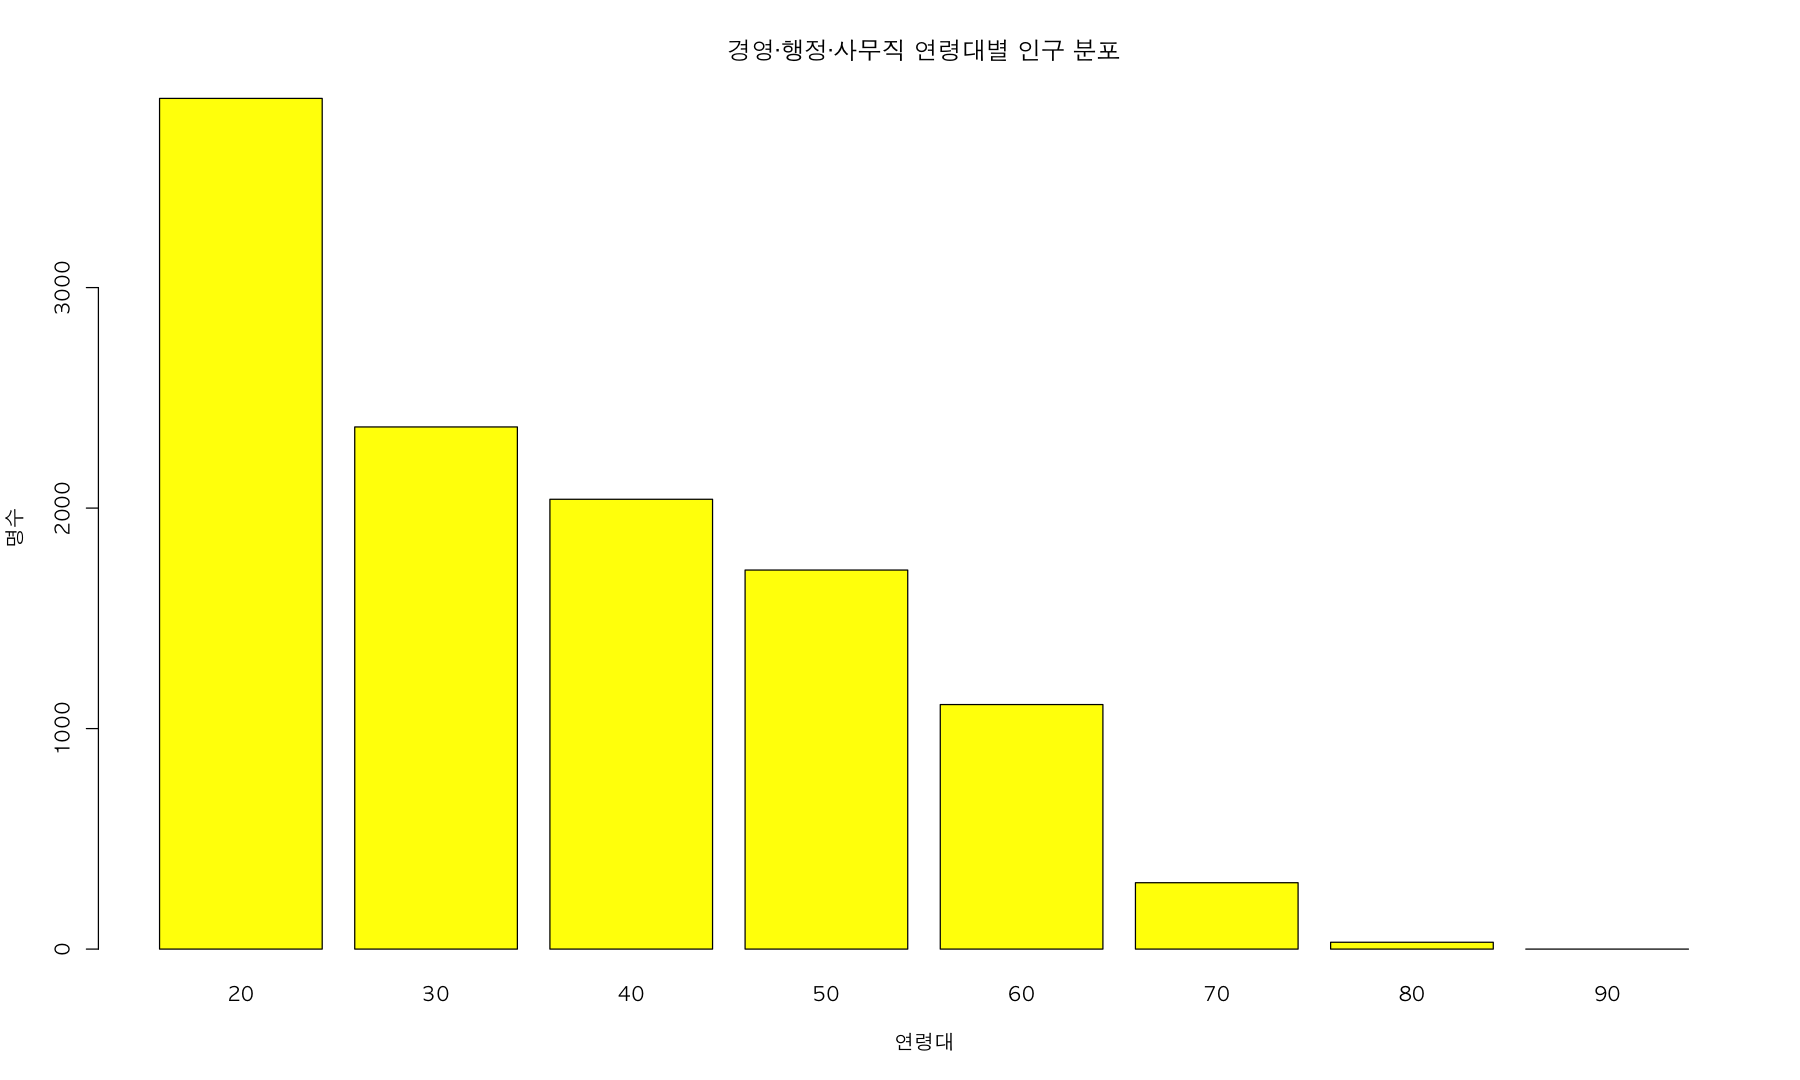

In [7]:
par(family="AppleGothic",bg="white")
# '경영·행정·사무직'에 해당하는 데이터만 추출
raw_data_employed_category <- subset(raw_data_employed, 취업직종대분류 == "경영·행정·사무직")

# 추출한 데이터의 '연령대' 빈도를 계산
age_freq <- table(raw_data_employed_category$연령대)

# 막대 그래프 그리기
barplot(age_freq, names.arg = names(age_freq), col ="yellow",xlab = "연령대", ylab = "명수", main = "경영·행정·사무직 연령대별 인구 분포")

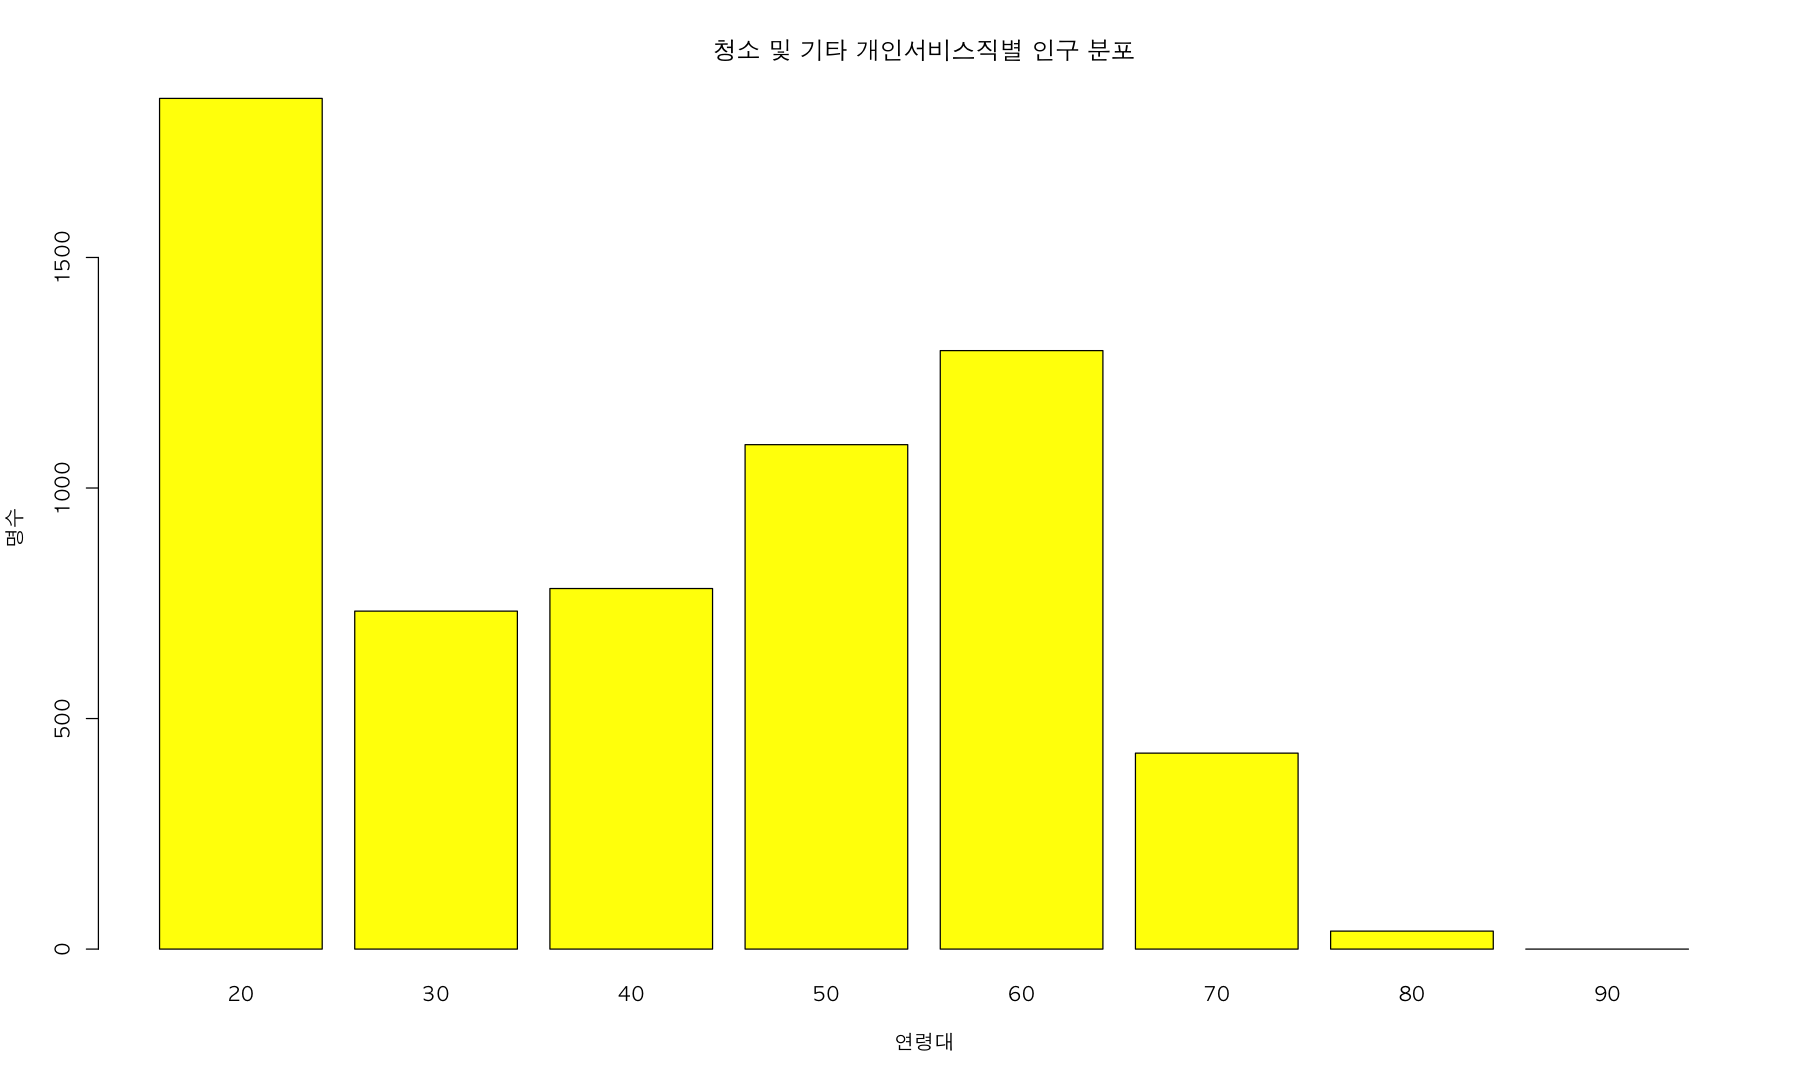

In [8]:
par(family="AppleGothic",bg="white")
# '경영·행정·사무직'에 해당하는 데이터만 추출
subset_job_category <- subset(raw_data_employed, 취업직종대분류 == "청소 및 기타 개인서비스직")

# 추출한 데이터의 '연령대' 빈도를 계산
age_freq <- table(subset_job_category$연령대)

# 막대 그래프 그리기
barplot(age_freq, names.arg = names(age_freq),col ="yellow", xlab = "연령대", ylab = "명수", main = "청소 및 기타 개인서비스직별 인구 분포")

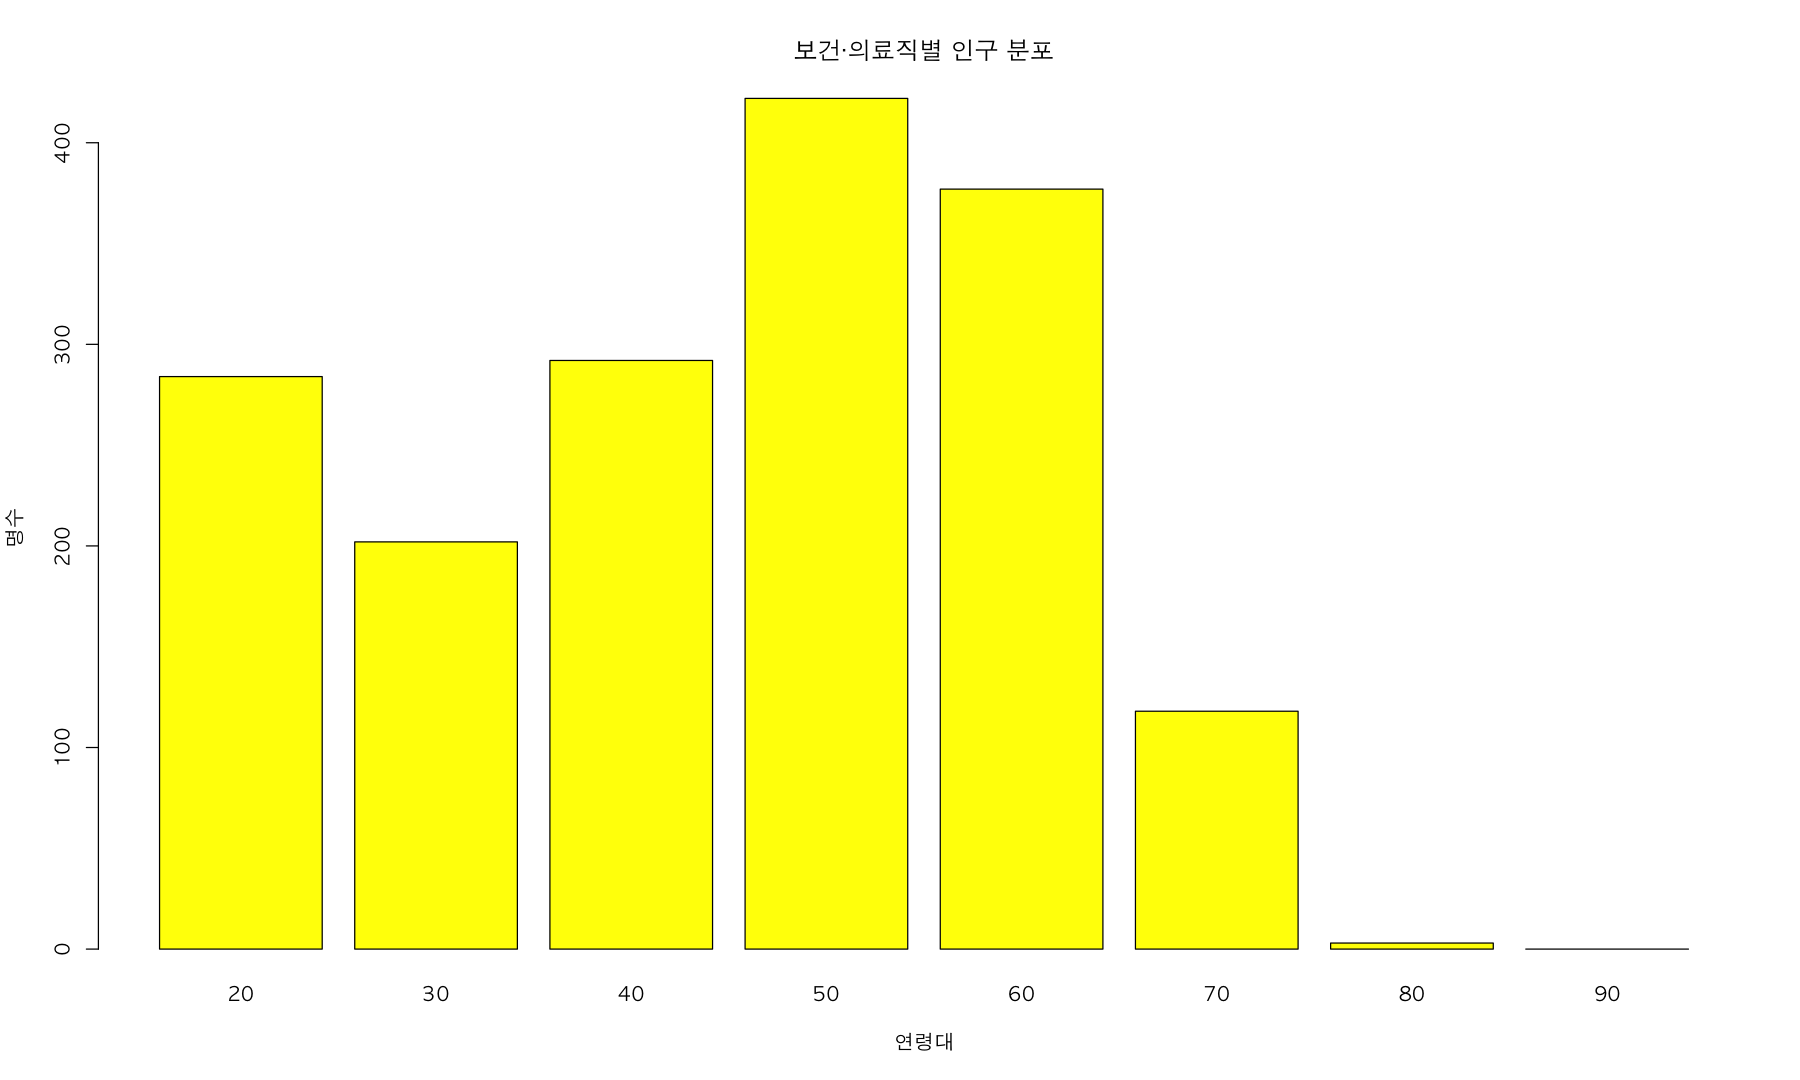

In [9]:
par(family="AppleGothic",bg="white")
# '경영·행정·사무직'에 해당하는 데이터만 추출
subset_job_category <- subset(raw_data_employed, 취업직종대분류 == "보건·의료직")

# 추출한 데이터의 '연령대' 빈도를 계산
age_freq <- table(subset_job_category$연령대)

# 막대 그래프 그리기
barplot(age_freq, names.arg = names(age_freq), col= 'yellow', xlab = "연령대", ylab = "명수", main = "보건·의료직별 인구 분포")

`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


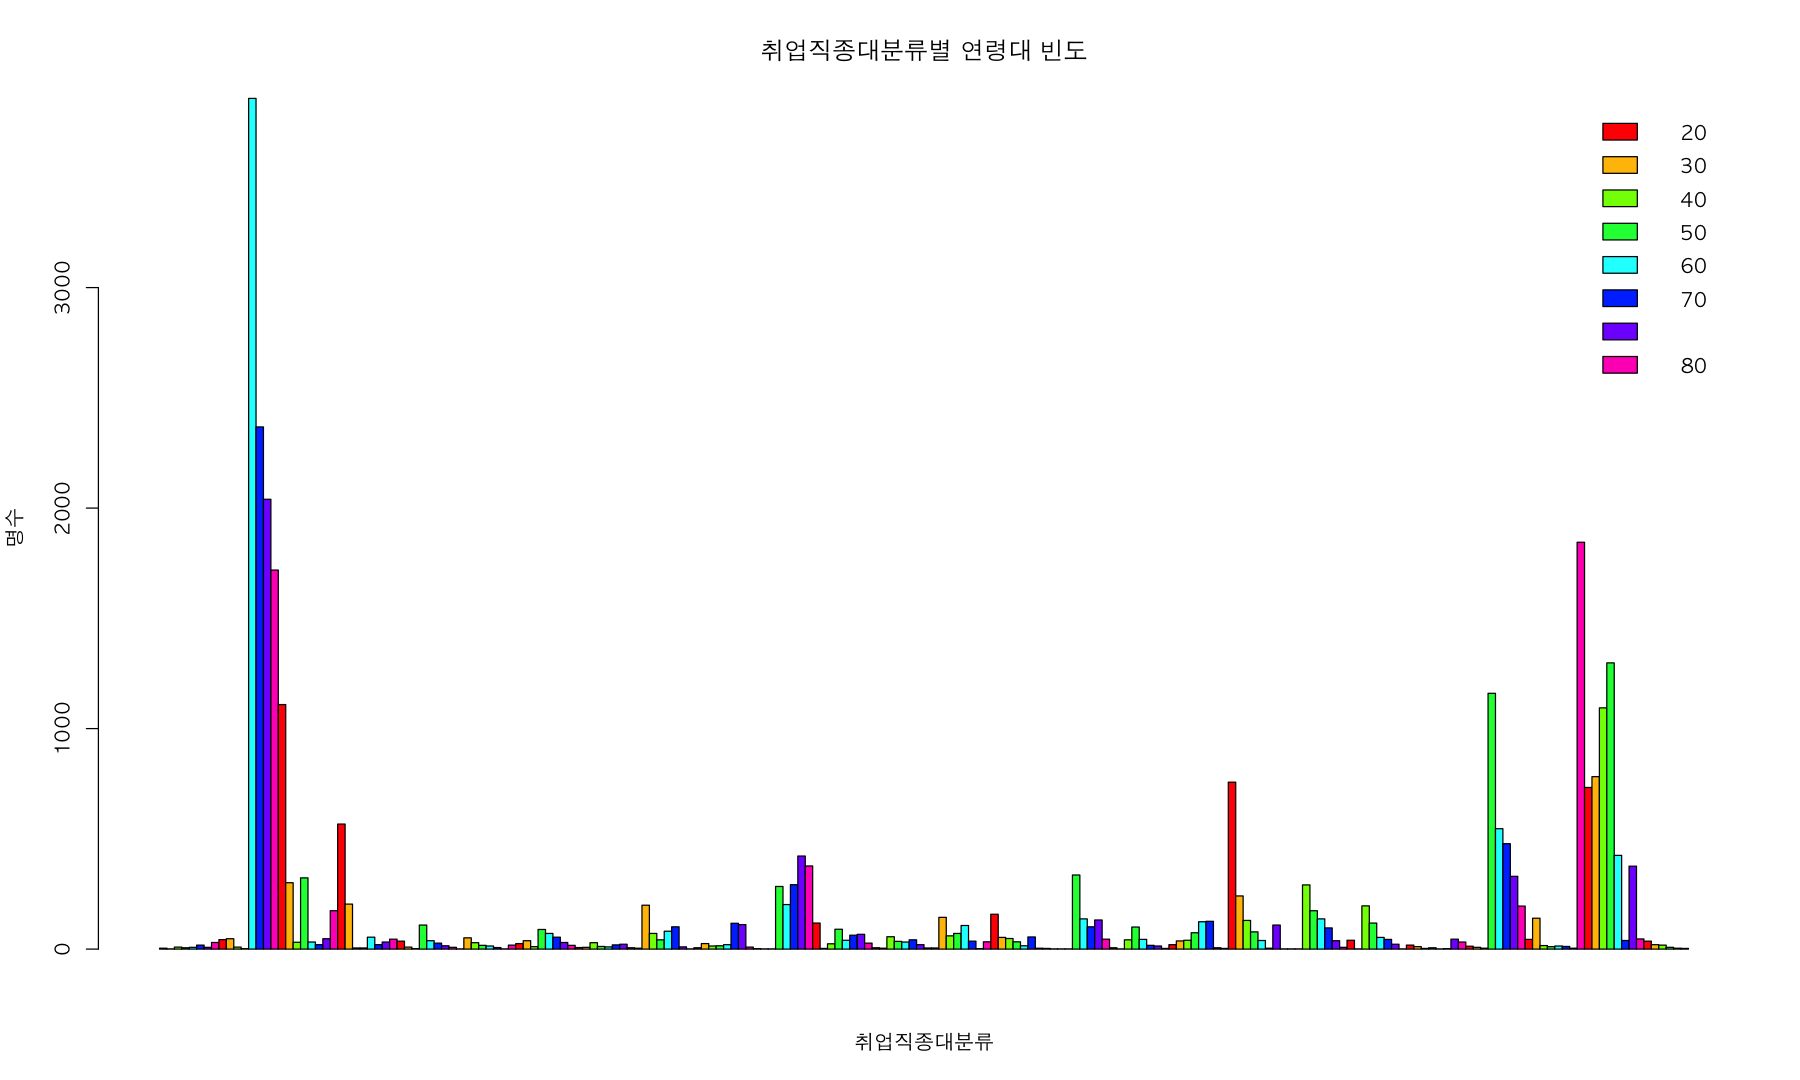

In [10]:
par(family="AppleGothic",bg="white")

# 취업직종대분류별 연령대 빈도 계산
age_freq_by_job_category <- raw_data_employed %>%
  group_by(취업직종대분류, 연령대) %>%
  summarise(count = n())

# 막대 그래프 그리기
barplot(as.matrix(age_freq_by_job_category$count),
        beside = TRUE,
        col = rainbow(length(unique(age_freq_by_job_category$연령대))),
        legend = unique(age_freq_by_job_category$연령대),
        args.legend = list(x = "topright", bty = "n"),
        xlab = "취업직종대분류",
        ylab = "명수",
        main = "취업직종대분류별 연령대 빈도")


`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


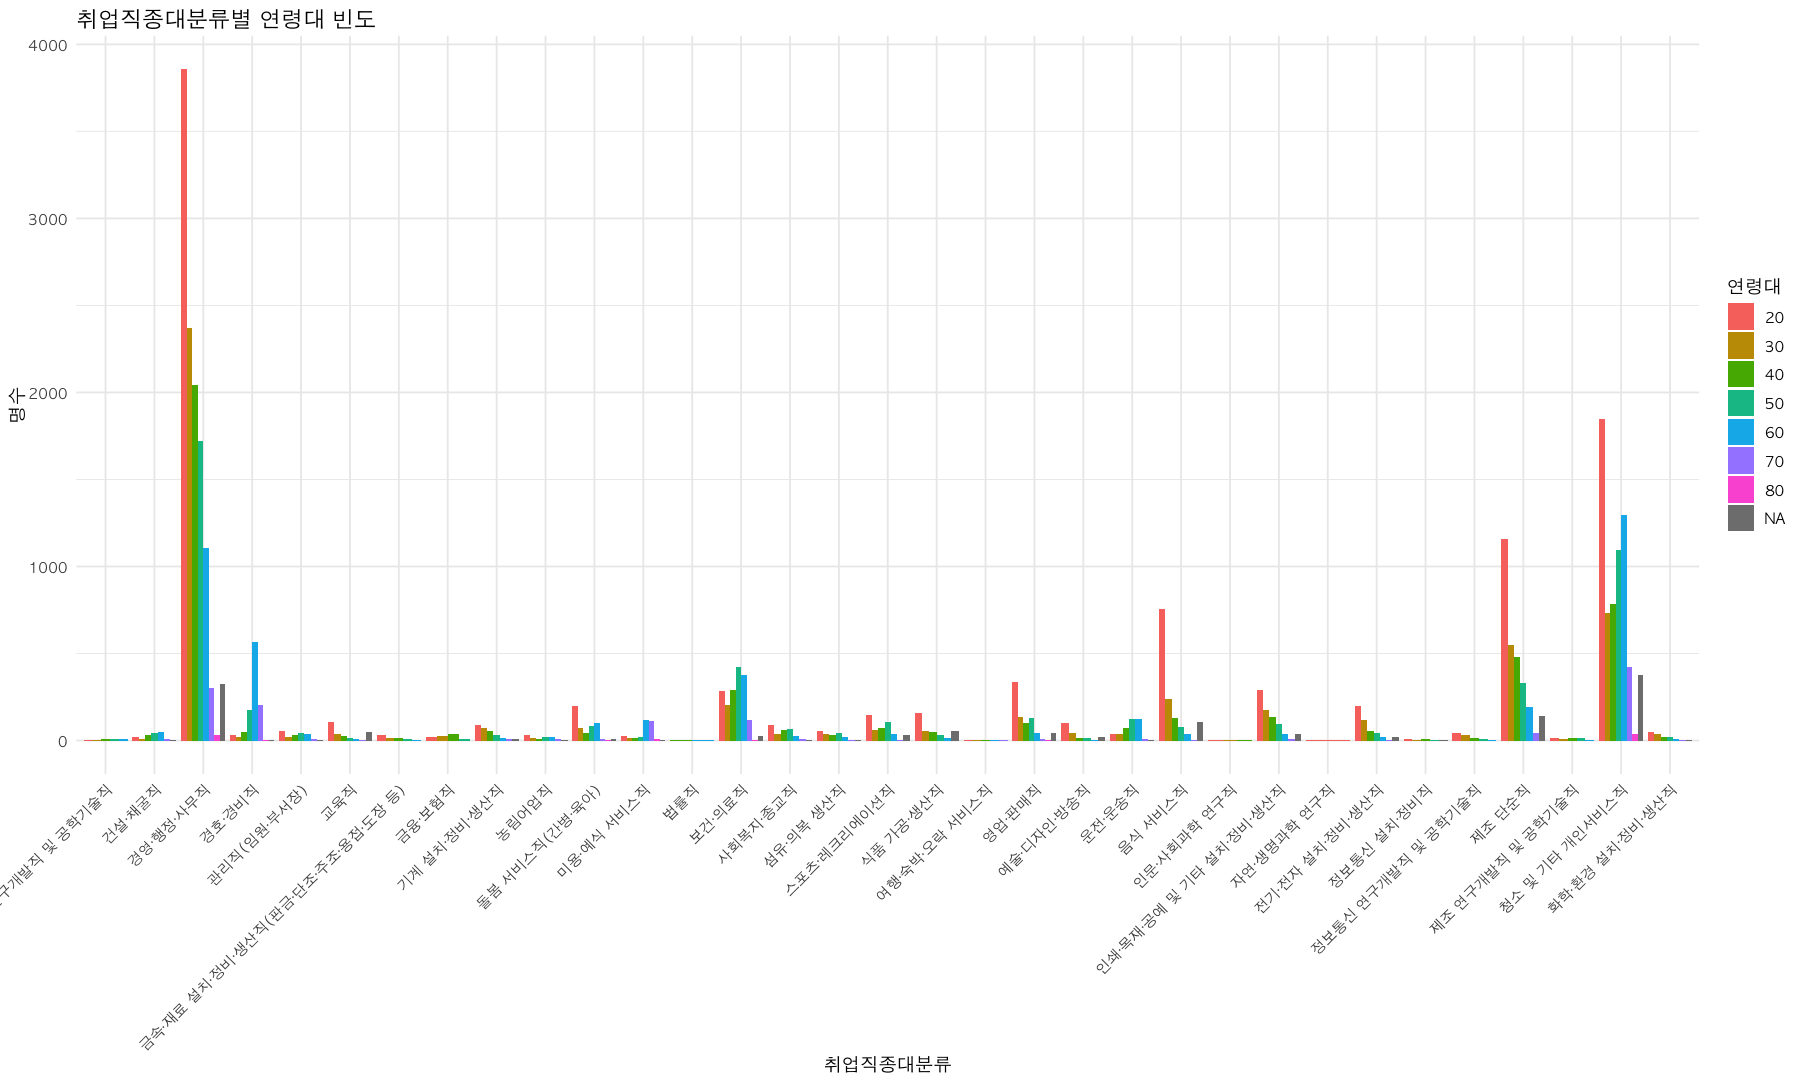

In [11]:
par(family="AppleGothic",bg="white")

# ggplot2 라이브러리 설치 및 불러오기
library(ggplot2)

# 취업직종대분류별 연령대 빈도 계산
age_freq_by_job_category <- raw_data_employed %>%
  group_by(취업직종대분류, 연령대) %>%
  summarise(count = n())

# ggplot2를 사용하여 그래프 그리기
ggplot(age_freq_by_job_category, aes(x = 취업직종대분류, y = count, fill = 연령대)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "취업직종대분류", y = "명수", title = "취업직종대분류별 연령대 빈도") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(family = "AppleGothic")
        )


`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


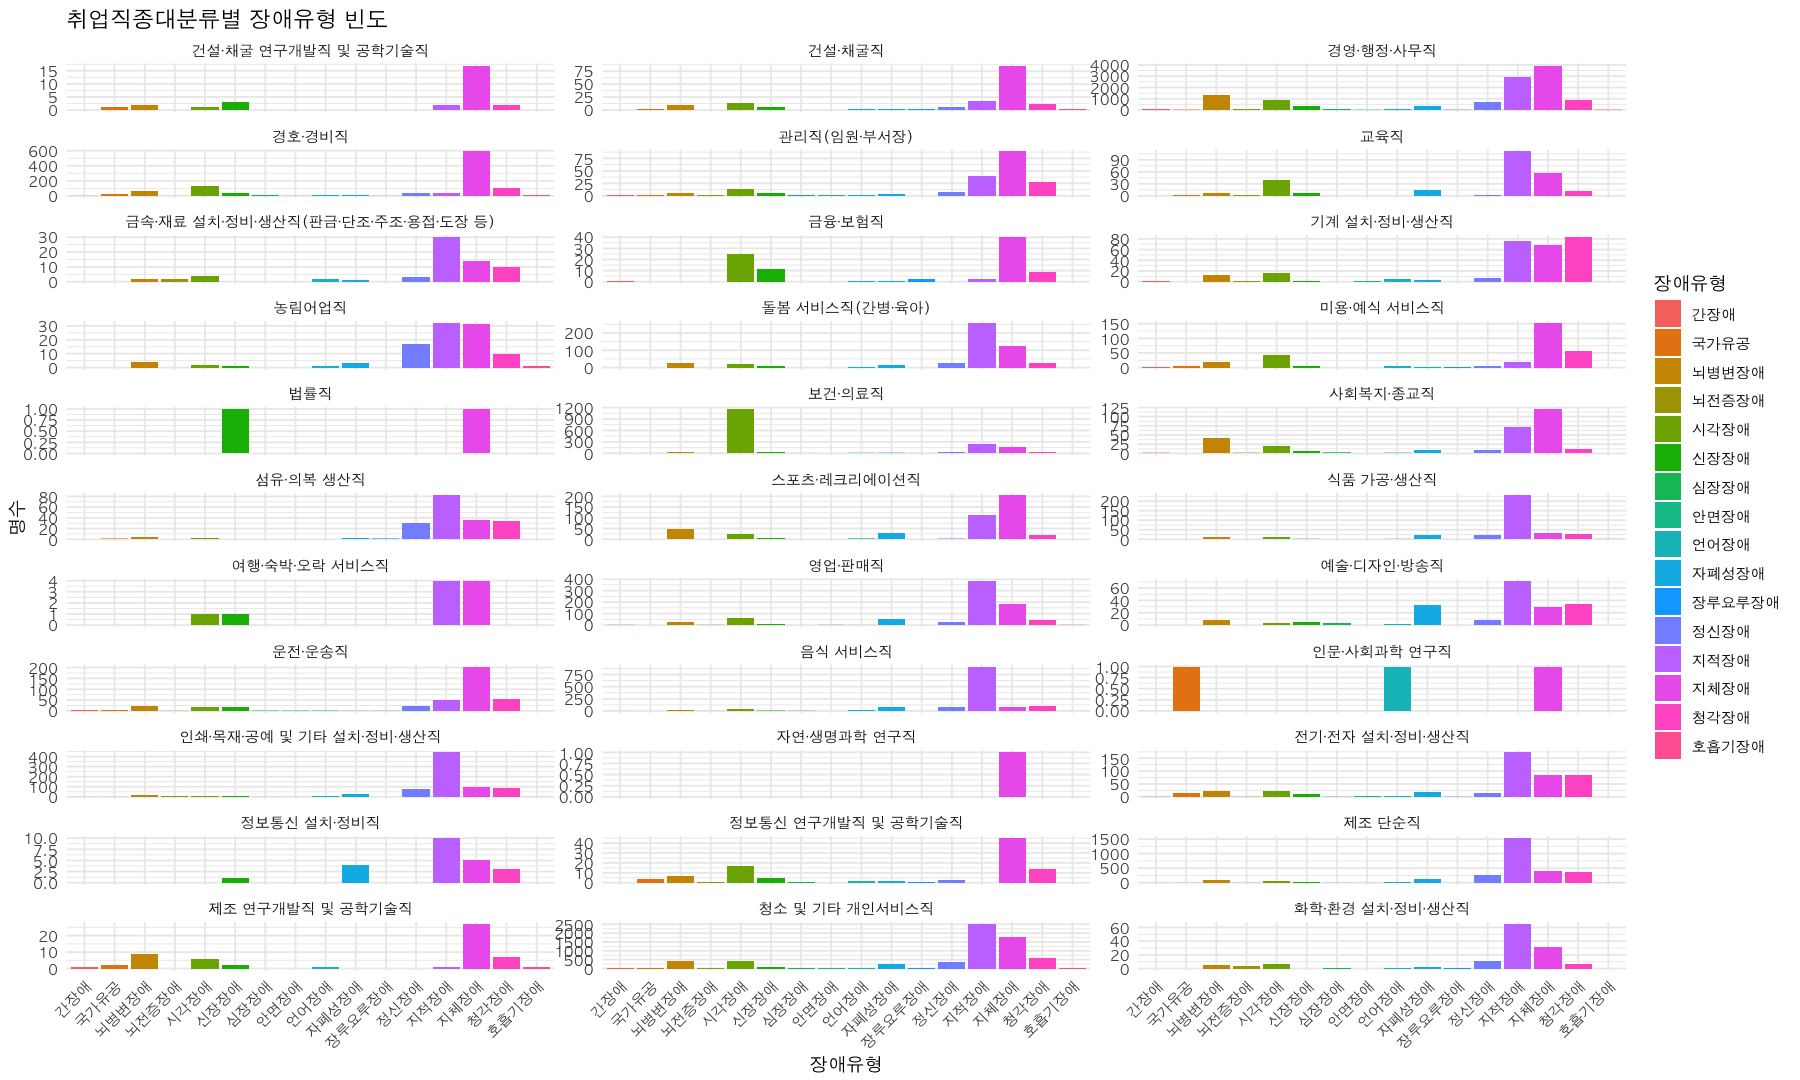

In [12]:
# 취업직종대분류별 연령대 빈도 계산
disable_freq_by_job_category <- raw_data_employed %>%
  group_by(취업직종대분류, 장애유형) %>%
  summarise(count = n())

# ggplot2를 사용하여 그래프 그리기 (그리드 레이아웃)
p <- ggplot(disable_freq_by_job_category, aes(x = 장애유형, y = count, fill = 장애유형)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "장애유형", y = "명수", title = "취업직종대분류별 장애유형 빈도") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(family = "AppleGothic")) +
  facet_wrap(~ 취업직종대분류, ncol = 3, scales = "free_y")  # scales = "free_y"로 y축 범위 개별 설정

print(p)


`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


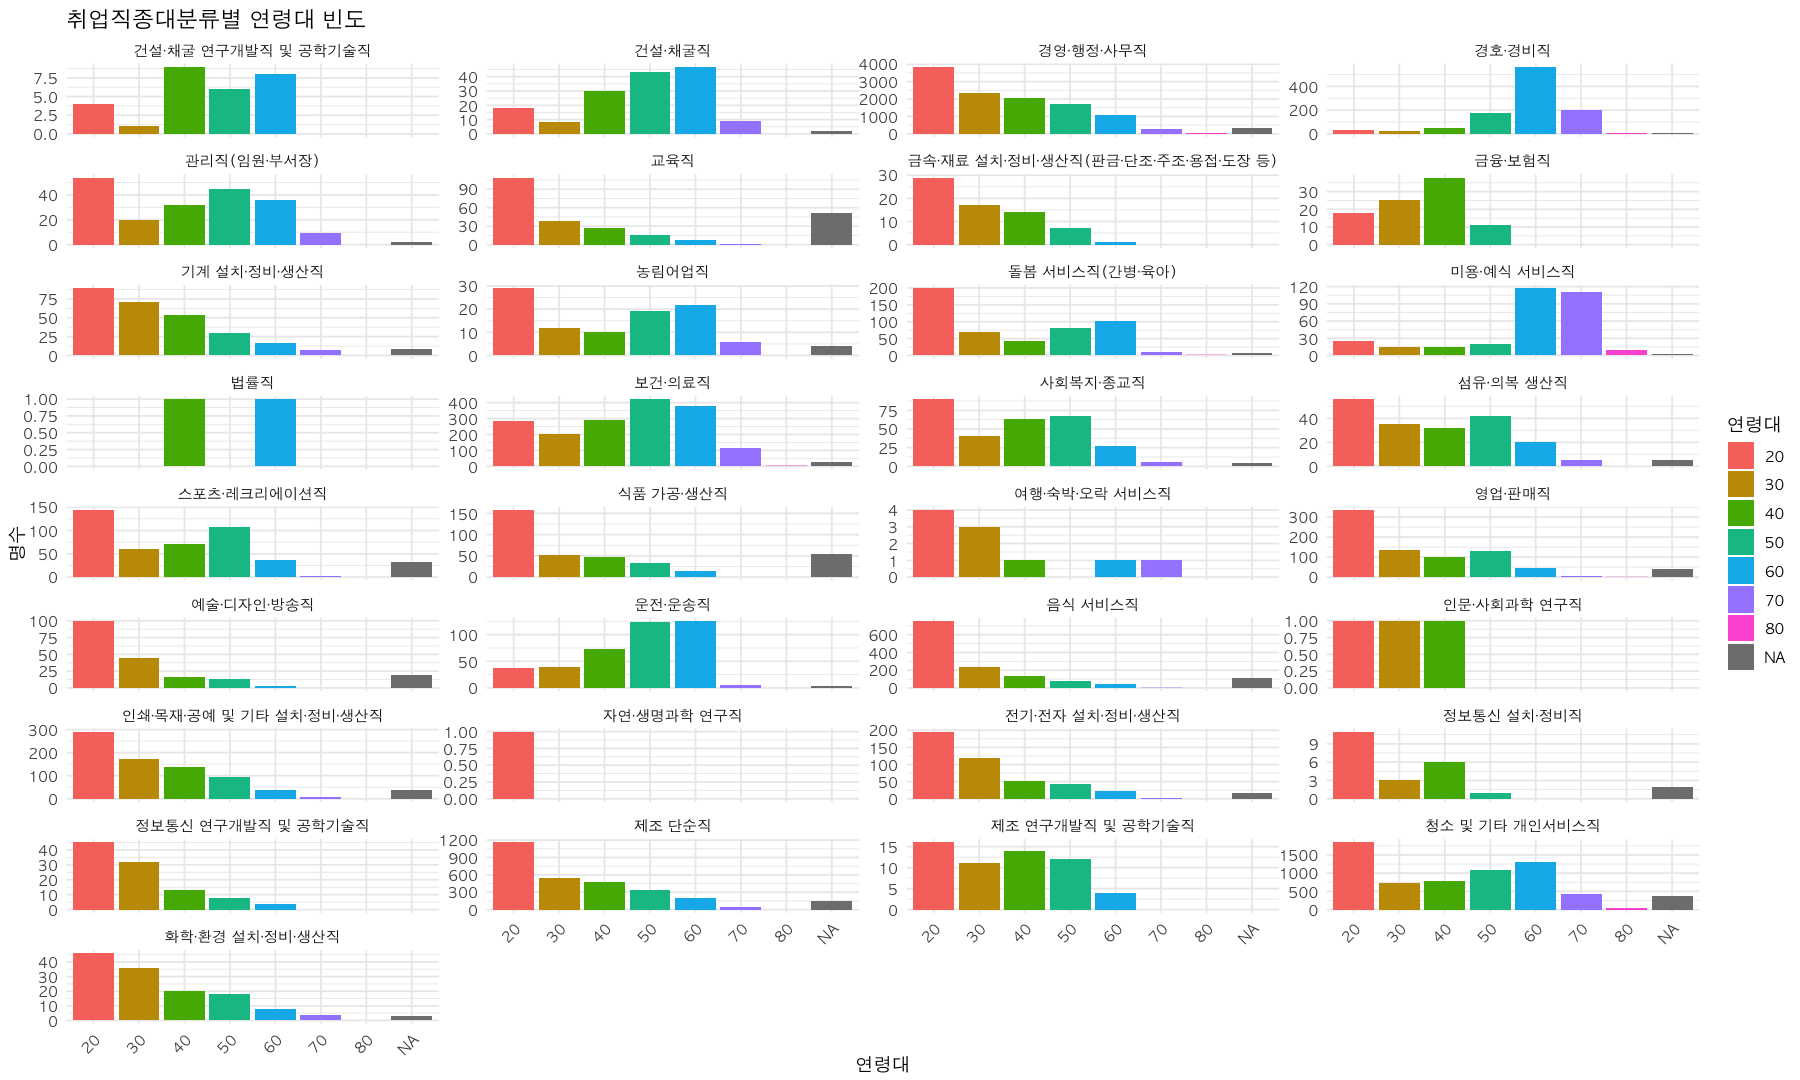

In [13]:
# 취업직종대분류별 연령대 빈도 계산
age_freq_by_job_category <- raw_data_employed %>%
  group_by(취업직종대분류, 연령대) %>%
  summarise(count = n())

# ggplot2를 사용하여 그래프 그리기 (그리드 레이아웃)
p1 <- ggplot(age_freq_by_job_category, aes(x = 연령대, y = count, fill = 연령대)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "연령대", y = "명수", title = "취업직종대분류별 연령대 빈도") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(family = "AppleGothic")) +
  facet_wrap(~ 취업직종대분류, ncol = 4, scales = "free_y")  # scales = "free_y"로 y축 범위 개별 설정

print(p1)

`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


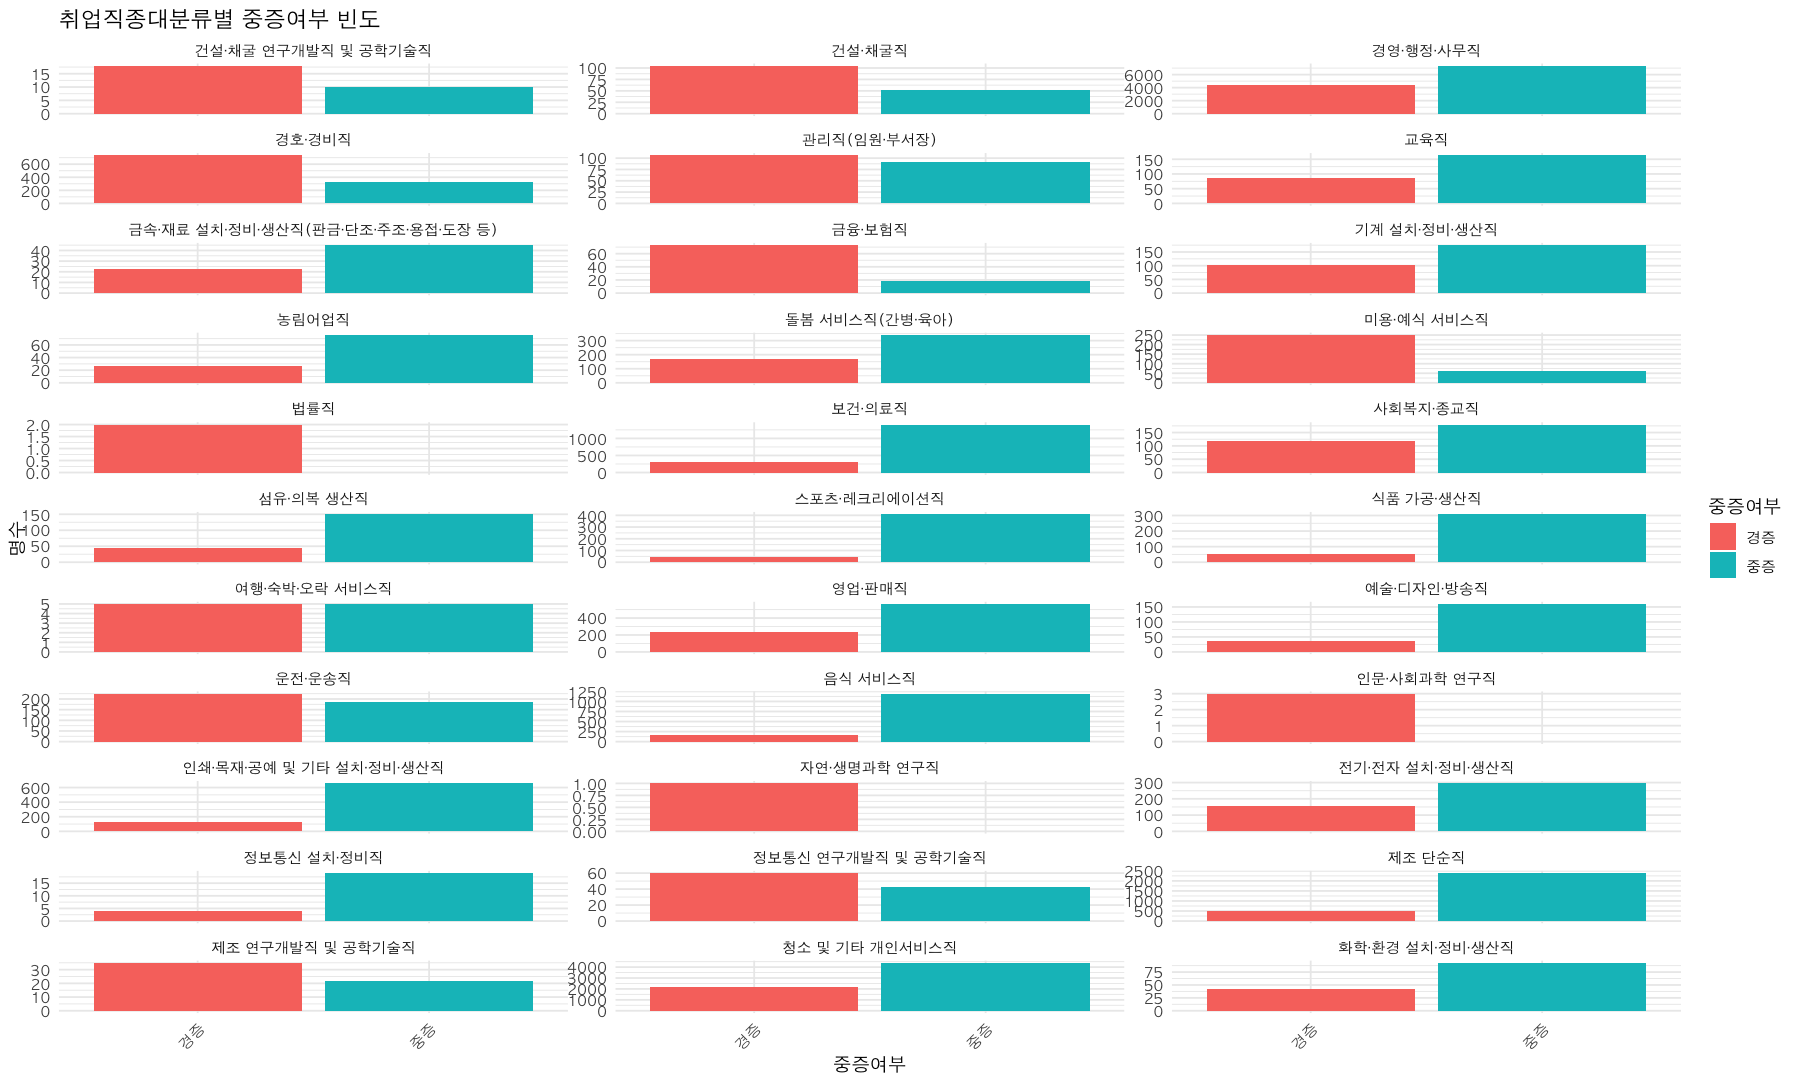

In [14]:


# 취업직종대분류별 연령대 빈도 계산
stress_freq_by_job_category <- raw_data_employed %>%
  group_by(취업직종대분류,중증여부 ) %>%
  summarise(count = n())

# ggplot2를 사용하여 그래프 그리기 (그리드 레이아웃)
p3 <- ggplot(stress_freq_by_job_category, aes(x = 중증여부, y = count, fill = 중증여부)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "중증여부", y = "명수", title = "취업직종대분류별 중증여부 빈도") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(family = "AppleGothic")) +
  facet_wrap(~ 취업직종대분류, ncol = 3, scales = "free_y")  # scales = "free_y"로 y축 범위 개별 설정

print(p3)


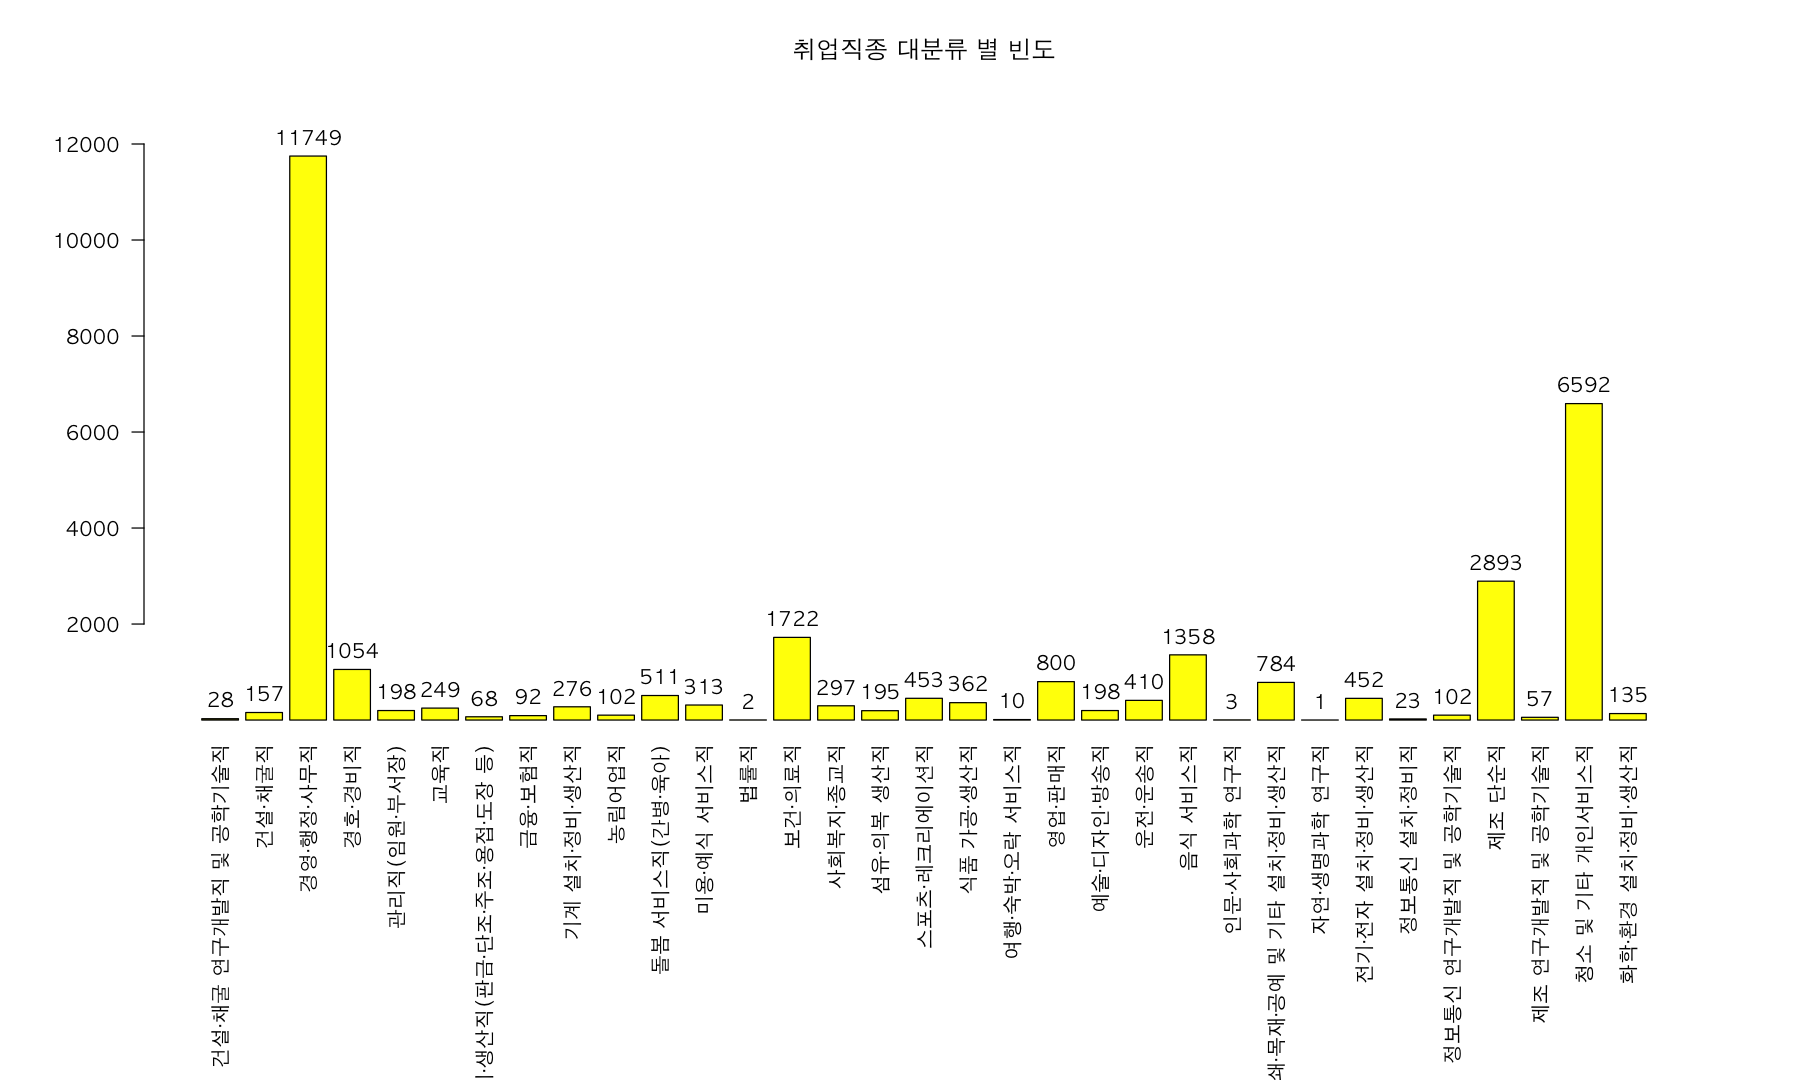

In [15]:
par(family = "AppleGothic", bg = "white")

par(mar = c(15, 6, 4, 4))  # 상, 우, 하, 좌 여백 조절
barplot(
    table(raw_data_employed$취업직종대분류),
    col = 'yellow',
    names.arg = names(table(raw_data_employed$취업직종대분류)),
    main = '취업직종 대분류 별 빈도',
    ylim = c(1, 13000),  # y축의 범위 설정
    las = 2
)

# y 값 조정을 위해 barplot의 결과를 변수에 저장
bar_heights <- table(raw_data_employed$취업직종대분류)
for (i in 1:length(bar_heights)) {
    text(
        x = i * 1.2 - 0.5,
        y = bar_heights[i] + 400,  # y값 조정
        labels = bar_heights[i],
        cex = 1
    )
}


In [16]:
print(table(raw_data_employed$취업직종대분류))



                     건설·채굴 연구개발직 및 공학기술직 
                                                     28 
                                            건설·채굴직 
                                                    157 
                                       경영·행정·사무직 
                                                  11749 
                                            경호·경비직 
                                                   1054 
                                    관리직(임원·부서장) 
                                                    198 
                                                 교육직 
                                                    249 
금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등) 
                                                     68 
                                            금융·보험직 
                                                     92 
                                  기계 설치·정비·생산직 
                                                    276 
                                             농림어업직 


In [17]:
### 100명 이하인 직업군 지우기
raw_data_employed_filtered <- subset(raw_data_employed, !(취업직종대분류 %in% c("건설·채굴 연구개발직 및 공학기술직", "자연·생명과학 연구직", "법률직", "여행·숙박·오락 서비스직", "인문·사회과학 연구직", "자연·생명과학 연구직", "제조 연구개발직 및 공학기술직", "정보통신 설치·정비직")))

In [18]:
summary(raw_data_employed_filtered)

      순번         취업일자              연령         장애유형        
 Min.   :    1   Length:31522       Min.   :17.00   Length:31522      
 1st Qu.: 7904   Class :character   1st Qu.:25.00   Class :character  
 Median :15820   Mode  :character   Median :38.00   Mode  :character  
 Mean   :15817                      Mean   :40.71                     
 3rd Qu.:23726                      3rd Qu.:55.00                     
 Max.   :31646                      Max.   :87.00                     
                                                                      
   중증여부           근무지역         취업직종대분류         연령대     
 Length:31522       Length:31522       Length:31522       20     :10005  
 Class :character   Class :character   Class :character   30     : 5155  
 Mode  :character   Mode  :character   Mode  :character   50     : 4773  
                                                          40     : 4660  
                                                          60     : 4278  
                  

In [19]:
table(raw_data_employed_filtered$취업직종대분류)


                                            건설·채굴직 
                                                    157 
                                       경영·행정·사무직 
                                                  11749 
                                            경호·경비직 
                                                   1054 
                                    관리직(임원·부서장) 
                                                    198 
                                                 교육직 
                                                    249 
금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등) 
                                                     68 
                                            금융·보험직 
                                                     92 
                                  기계 설치·정비·생산직 
                                                    276 
                                             농림어업직 
                                                    102 
                               돌봄 서비스직(간병·

`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


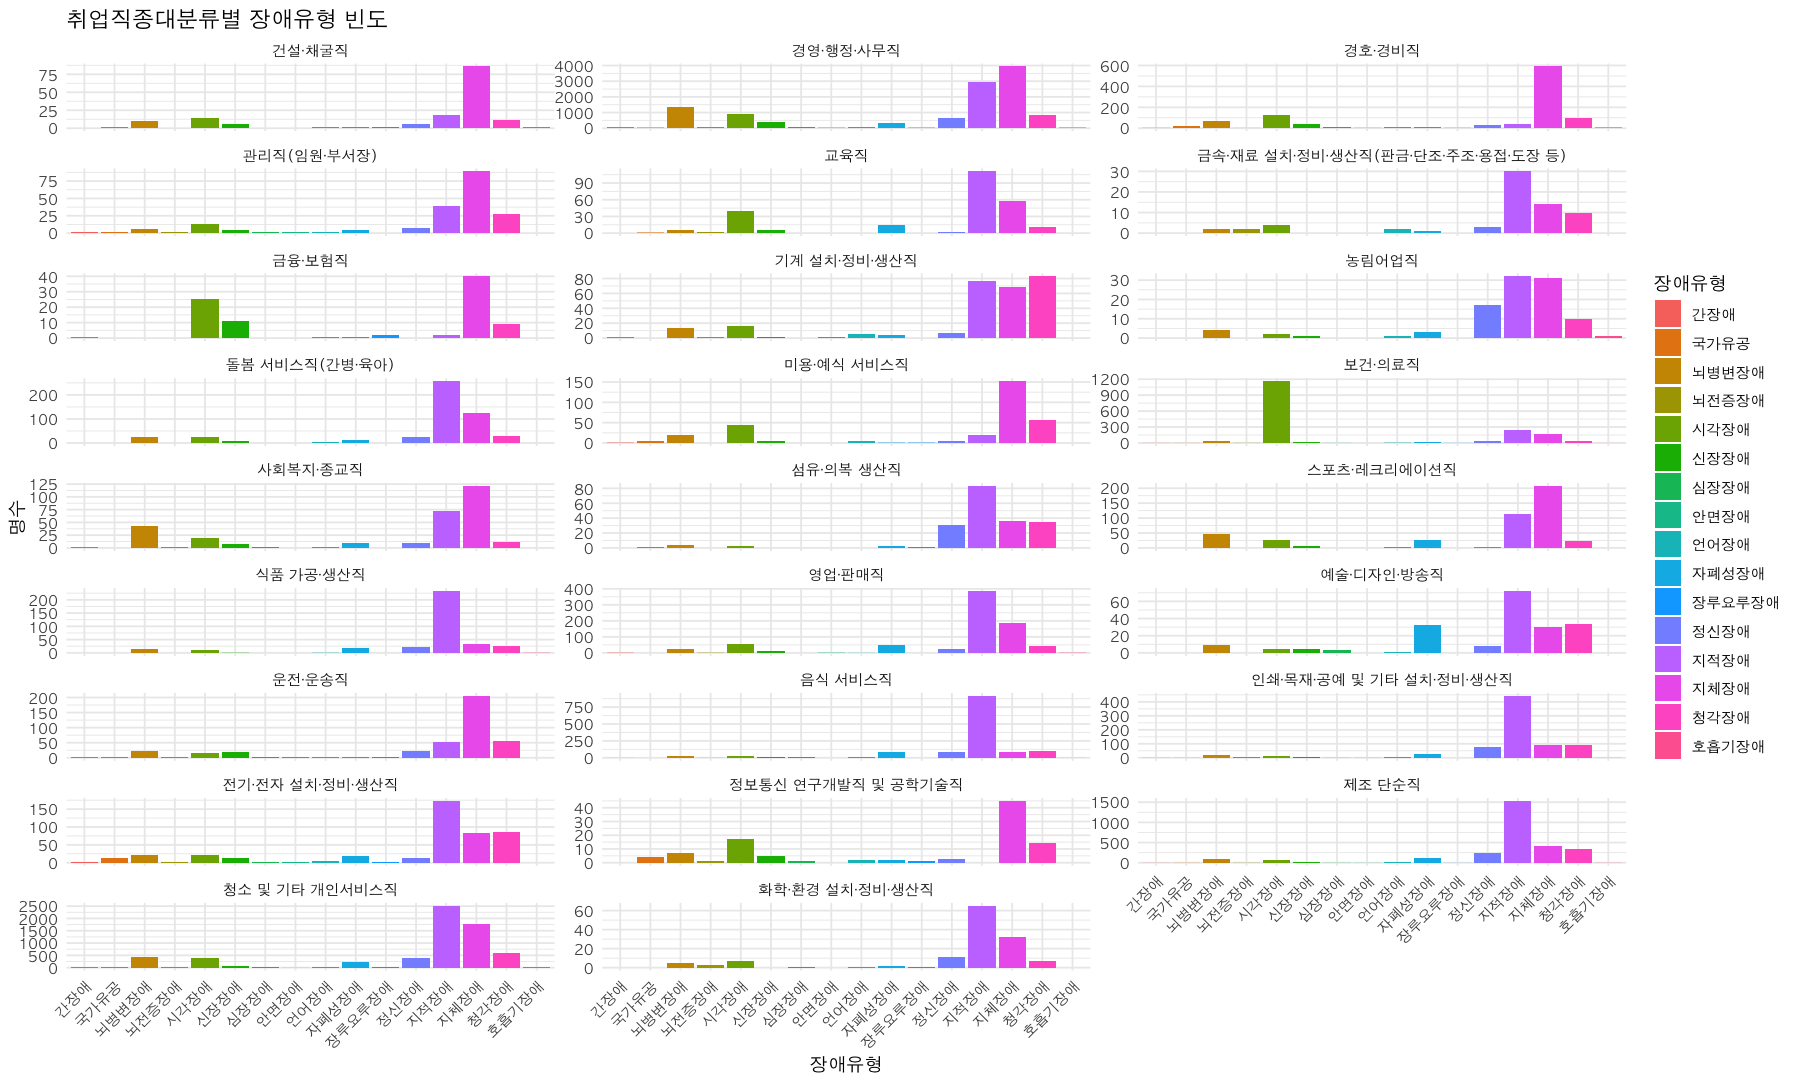

In [20]:
# 취업직종대분류별 연령대 빈도 계산빼고 계산
disable_freq_by_job_category_filtered <- raw_data_employed_filtered %>%
  group_by(취업직종대분류, 장애유형) %>%
  summarise(count = n())

# ggplot2를 사용하여 그래프 그리기 (그리드 레이아웃)
p <- ggplot(disable_freq_by_job_category_filtered, aes(x = 장애유형, y = count, fill = 장애유형)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "장애유형", y = "명수", title = "취업직종대분류별 장애유형 빈도") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(family = "AppleGothic")) +
  facet_wrap(~ 취업직종대분류, ncol = 3, scales = "free_y")  # scales = "free_y"로 y축 범위 개별 설정

print(p)


`summarise()` has grouped output by '취업직종대분류'. You can override using
the `.groups` argument.


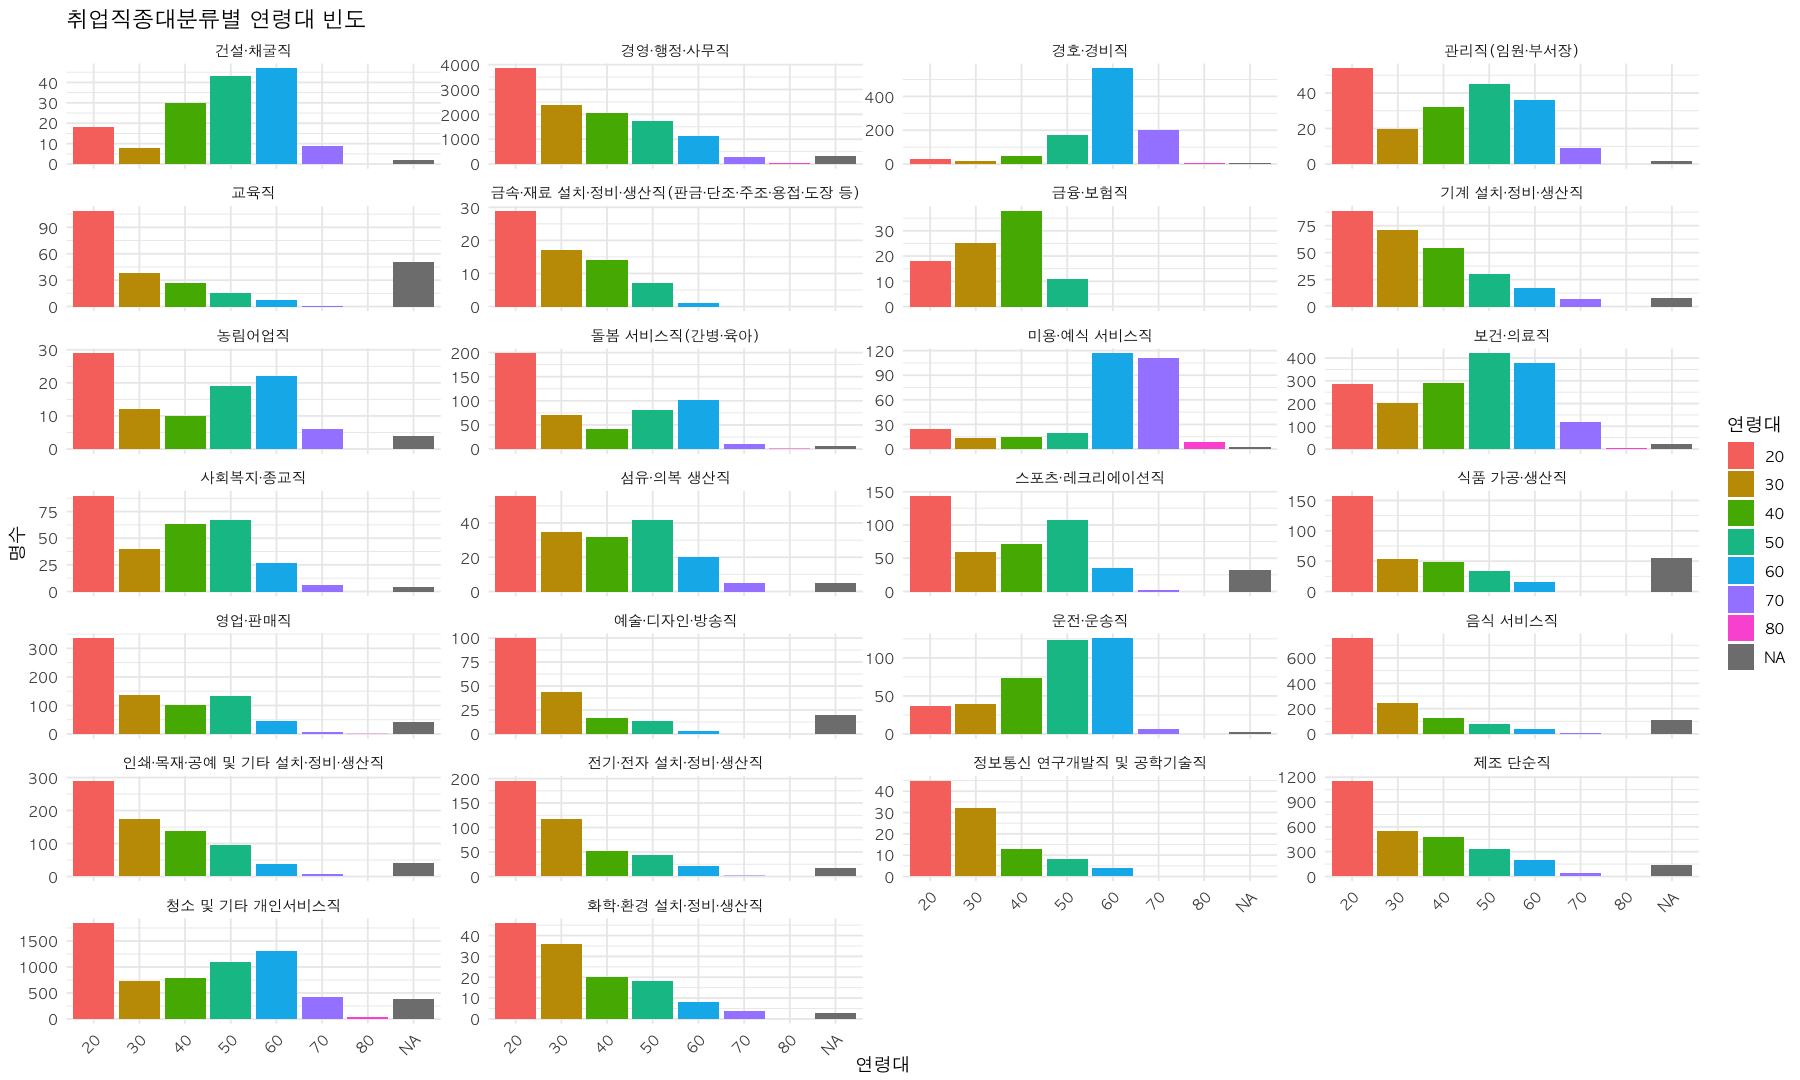

In [21]:
# 취업직종대분류별 연령대 빈도 계산
age_freq_by_job_category_filtered <- raw_data_employed_filtered %>%
  group_by(취업직종대분류, 연령대) %>%
  summarise(count = n())

# ggplot2를 사용하여 그래프 그리기 (그리드 레이아웃)
p1 <- ggplot(age_freq_by_job_category_filtered, aes(x = 연령대, y = count, fill = 연령대)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "연령대", y = "명수", title = "취업직종대분류별 연령대 빈도") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(family = "AppleGothic")) +
  facet_wrap(~ 취업직종대분류, ncol = 4, scales = "free_y")  # scales = "free_y"로 y축 범위 개별 설정

print(p1)